# Project 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

**Joint PMF**<br>
$P_{XY}(0,0)=\frac{1}{8}$<br>
$P_{XY}(0,1)=\frac{1}{8}$<br>
$P_{XY}(1,0)=\frac{1}{4}$<br>
$P_{XY}(1,1)=\frac{1}{2}$<br>
**Marginal PMF**<br>
$P_{X}(0)=\frac{1}{4}$<br>
$P_{X}(1)=\frac{3}{4}$<br>
$P_{Y}(0)=\frac{3}{8}$<br>
$P_{Y}(1)=\frac{5}{8}$<br>

In [14]:
# let (0,0) = 0, (0,1) = 1, (1,0) = 2, (1,1) =3
results = np.array([0,1,2,3])
# pmf
p = np.array([0.125, 0.125, 0.25, 0.5])
# trials
trials = 10000
realizations = np.random.choice(results,size = trials, replace = True, p = p)
realizations

array([2, 1, 3, ..., 3, 3, 3])

In [15]:
print("Simulation:")
print("PXY(0,0) = ", np.sum(realization == 0)/trials)
print("PXY(0,1) = ", np.sum(realization == 1)/trials)
print("PXY(1,0) = ", np.sum(realization == 2)/trials)
print("PXY(1,1) = ", np.sum(realization == 3)/trials)
print("PX(0) = ", (np.sum(realization == 0) + np.sum(realization == 1))/trials)
print("PX(1) = ", (np.sum(realization == 2) + np.sum(realization == 3))/trials)
print("PY(0) = ", (np.sum(realization == 0) + np.sum(realization == 2))/trials)
print("PY(1) = ", (np.sum(realization == 1) + np.sum(realization == 3))/trials)

Simulation:
PXY(0,0) =  0.1275
PXY(0,1) =  0.125
PXY(1,0) =  0.2508
PXY(1,1) =  0.4967
PX(0) =  0.2525
PX(1) =  0.7475
PY(0) =  0.3783
PY(1) =  0.6217


## Problem 2

<font size =4>**The calculation result is:**</br></br></font>
<font size =5>
$\rho_{XY} = \frac{E(XY)-E(X)E(Y)}{\sqrt{var(X)var(Y)}}$</br>
$=\frac{\frac{1}{2}-\frac{3}{4}\times\frac{5}{8}}{\sqrt{\frac{1}{4}\times\frac{3}{4}\times\frac{3}{8}\times\frac{5}{8}}} = 
\frac{\sqrt{5}}{15} \approx 0.149071
$
</font>

In [43]:
results = np.array([0,1,2,3])
# pmf
p = np.array([0.125, 0.125, 0.25, 0.5])
# trials
trials = 500000
realizations = np.random.choice(results,size = trials, replace = True, p = p)
# Convert the one-dimensional results back to the two-dimensional results
realizations_XY = np.zeros([trials,2])
for i in range(trials):
    if realizations[i] <= 1:
        realizations_XY[i,0] = 0
    else: realizations_XY[i,0] = 1
    
    if realizations[i] % 2 == 0:
        realizations_XY[i,1] = 0
    else: realizations_XY[i,1] = 1
realizations_XY = pd.DataFrame(realizations_XY,columns=['X','Y'])
# use pandas.Dataframe.corr() function to calculate the sample correlation coefficient matrix
realizations_XY.corr()
# np.corrcoef(results_XY.T)

,X,Y
X,1.000000,0.149304
Y,0.149304,1.000000


In [44]:
print("Simulation:")
print("correlation coefficient = ", realizations_XY.corr()['X']['Y'])

Simulation:
correlation coefficient =  0.14930448577788583


## Problem 3

In [165]:
from scipy import stats
# parameters
p = 0.5
# X and Y range from 1 ~ 100
max_k = 101
trials = 5000

geom = np.zeros(max_k-1)
for i in range(1, max_k, 1):
#     use stats.geom.pmf to realize the geometric distribution
    geom[i - 1] = stats.geom.pmf(i,p = p)
# simulate
geom_results = np.arange(1,max_k,1)
geom_XY = np.zeros([2,trials])
# generlize two geometirc distribution X Y
geom_XY[0] = np.random.choice(geom_results,size = trials, replace = True, p = geom)
geom_XY[1] = np.random.choice(geom_results,size = trials, replace = True, p = geom)
geom_realize_XY = pd.DataFrame(geom_XY.T,columns=['X','Y'])
geom_realize_XY

,X,Y
0,1.0,3.0
1,3.0,2.0
2,4.0,2.0
3,1.0,1.0
4,8.0,1.0
...,...,...
4995,1.0,8.0
4996,3.0,1.0
4997,2.0,1.0
4998,1.0,3.0


In [166]:
# use X and Y to calculate Z
geom_realize_XY['Z'] = geom_realize_XY.sum(axis=1)
geom_realize_XY

,X,Y,Z
0,1.0,3.0,4.0
1,3.0,2.0,5.0
2,4.0,2.0,6.0
3,1.0,1.0,2.0
4,8.0,1.0,9.0
...,...,...,...
4995,1.0,8.0,9.0
4996,3.0,1.0,4.0
4997,2.0,1.0,3.0
4998,1.0,3.0,4.0


In [167]:
# Make simulation on the distribution of Z
frequency_Z = geom_realize_XY['Z'].value_counts(normalize=True)
frequency_Z.sort_index(inplace=True)
frequency_Z

2.0     0.2578
3.0     0.2468
4.0     0.1758
5.0     0.1282
6.0     0.0818
7.0     0.0476
8.0     0.0248
9.0     0.0168
10.0    0.0104
11.0    0.0058
12.0    0.0020
13.0    0.0006
14.0    0.0010
15.0    0.0002
16.0    0.0002
17.0    0.0002
Name: Z, dtype: float64

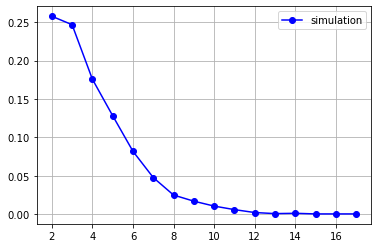

In [168]:
plt.plot(frequency_Z,"ob-",label = "simulation")
plt.legend()
plt.grid()
plt.show()

In [174]:
# calculate the actual PMF
def Pz(p,k):
    return p*p*(k-1)*np.power(1-p,k-2)
K = np.arange(2,np.max(frequency_Z.index)+1,1)
pmf_z = np.array([])
for k in K:
    pmf_z = np.append(pmf_z,Pz(p,k))
Z = pd.DataFrame()
Z['Simulation'] = frequency_Z
Z['Calculation'] = pmf_z
Z

,Simulation,Calculation
2.0,0.2578,0.250000
3.0,0.2468,0.250000
4.0,0.1758,0.187500
5.0,0.1282,0.125000
6.0,0.0818,0.078125
7.0,0.0476,0.046875
8.0,0.0248,0.027344
9.0,0.0168,0.015625
10.0,0.0104,0.008789
11.0,0.0058,0.004883


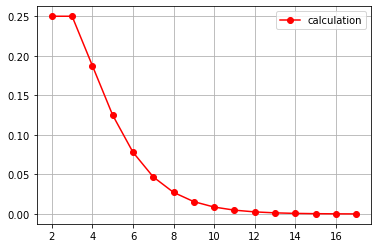

In [175]:
plt.plot(Z["Calculation"],"or-",label = "calculation")
plt.legend()
plt.grid()
plt.show()

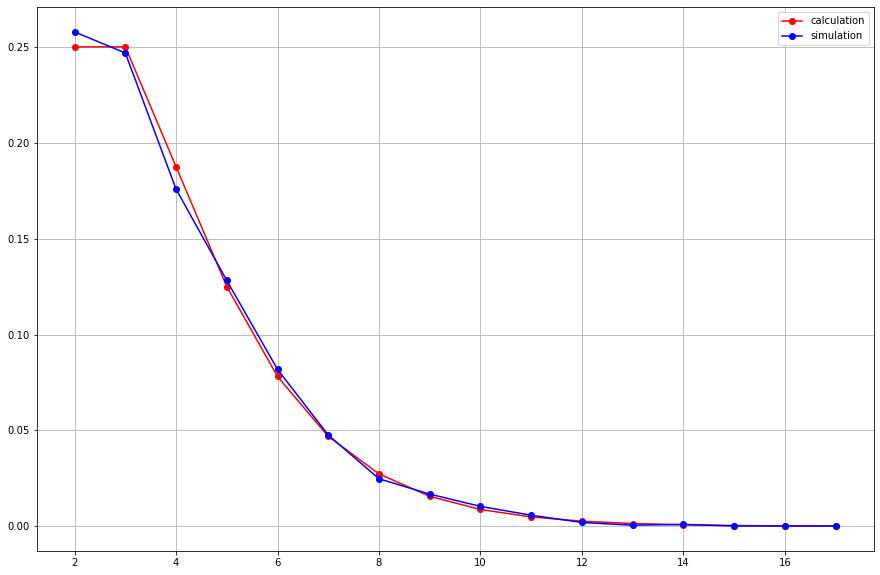

In [177]:
# Make comparisons
plt.figure(figsize=(15,10))
plt.plot(Z["Calculation"],"or-",label = "calculation")
plt.plot(Z["Simulation"],"ob-",label = "simulation")
plt.legend()
plt.grid()
plt.show()

## Problem 4

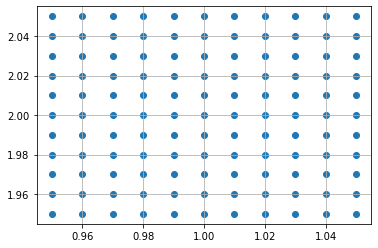

In [184]:
i = np.arange(1,12)
x = 0.95 + (i-1)/100
y = 1.95 + (i-1)/100
points = np.meshgrid(x, y)
plt.scatter(points[0],points[1])
plt.grid()
plt.show()

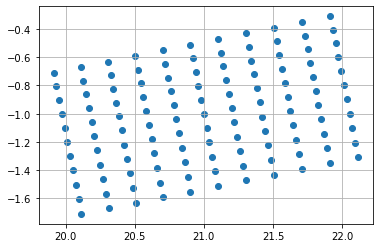

In [196]:
transform = points.copy()
transform[0] = points[0] ** 2+5 * points[1] ** 2
transform[1] = -5 * points[0] ** 2+points[1] ** 2
plt.scatter(transform[0],transform[1])
plt.grid()
plt.show()

**Jacobian factor:**</br>
<font size =5>
$\left|det(\frac{\partial(w,z)}{\partial(x,y)})\right| = \left|\left| \begin{matrix} 2x & 10y\\ -10x & 2y \end{matrix} \right|\right|
= \left|104xy\right| = 208$
</font>

In [209]:
# use determinant to calculate the area
area = np.abs( np.linalg.det( 
    [[points[0][10][0] - points[0][0][0],points[0][0][10] - points[0][0][0]]
    ,[points[1][10][0] - points[1][0][0],points[1][0][10] - points[1][0][0]]]))
area

0.009999999999999995

In [211]:
transform_area = np.abs( np.linalg.det( 
    [[transform[0][10][0] - transform[0][0][0],transform[0][0][10] - transform[0][0][0]]
    ,[transform[1][10][0] - transform[1][0][0],transform[1][0][10] - transform[1][0][0]]]))
transform_area

2.0799999999999996

In [215]:
print('Simulation:', transform_area / area )
print('Jacobian factor:', 208 )

Simulation: 208.00000000000006
Jacobian factor: 208


## Problem 5

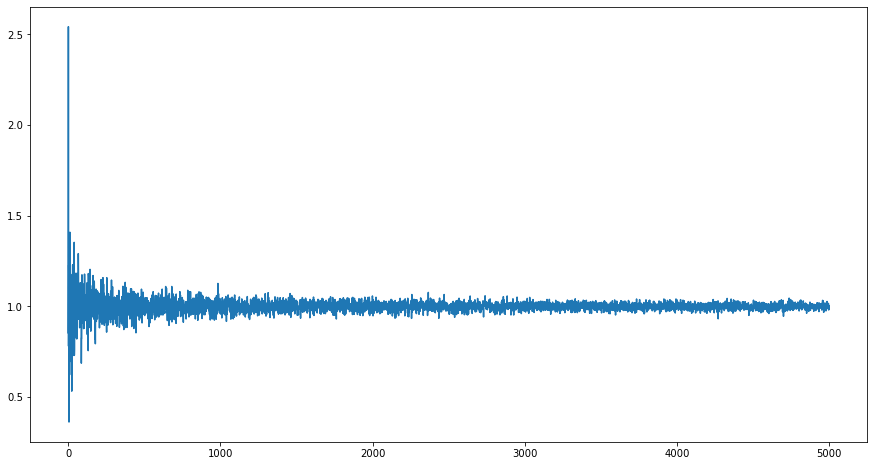

In [230]:
N = 5000
i = np.arange(1,N)
mean = np.array([])
for n in i:
    mean = np.append(mean,np.random.normal(loc=1,scale=1,size=n).mean())
plt.figure(figsize=(15,8))
plt.plot(i, mean)
plt.show()

In [231]:
np.mean(mean[N-100:])

1.0006430662230972

<font size = 5>**converge to 1** </font>

## Problem 6

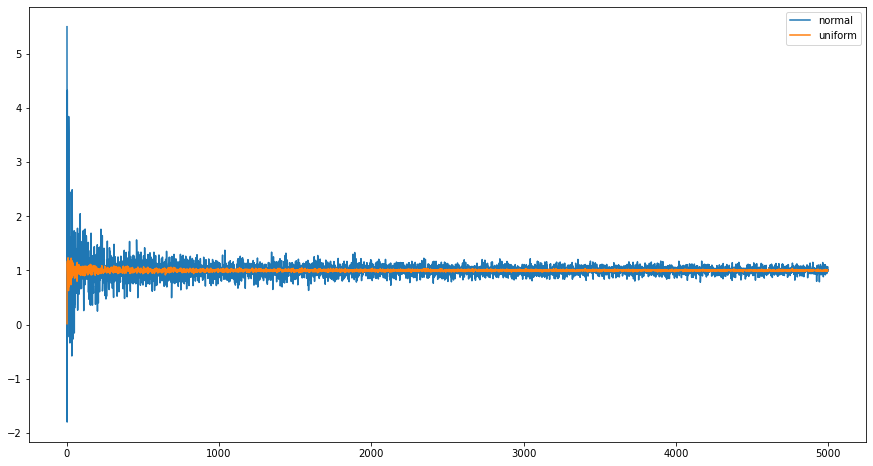

In [240]:
N = 5000
i = np.arange(1,N)
mean_X1 = np.array([])
mean_X2 = np.array([])
for n in i:
    mean_X1 = np.append(mean_X1,np.random.uniform(low =0, high = 2,size = n).mean())
    mean_X2 = np.append(mean_X2,np.random.normal(loc = 1,scale = 4,size = n).mean())
plt.figure(figsize=(15,8))
plt.plot(i, mean_X2,label = "normal")
plt.plot(i, mean_X1,label = "uniform")
plt.legend()
plt.show()

<font size = 5>**uniform converges faster because the variance is smaller** </font>

# Problem 7

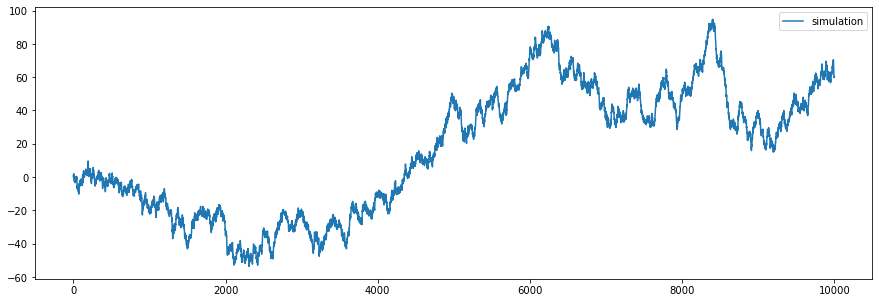

In [248]:
# parameters
mu = 1
sigma = 1

N = np.arange(1,10000)
X = np.array([])
mean = np.array([])
for i in N:
    X = np.append(X,np.random.normal(loc=mu,scale=i*sigma))
    mean = np.append(mean,X.mean())
plt.figure(figsize=(15,5))
plt.plot(N, mean,label="simulation")
plt.legend()
plt.show()

<font size = 5>**does't converge because the sample variance is increasing** </font>

<font size = 5>$\frac{\sum\limits_{i=1}^{N}(D(x_i))}{N^2} = \frac{N(N+1)\sigma^2}{2N^2} $</font>

<font size = 5>**the varience does converge to 0 as N goes to infinty** </font>